In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame,Series

C:\Users\aaa\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\aaa\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\aaa\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 6.4.1 透视表

### 首先介绍pivot_table函数的常用参数，value代表的是值，index为行，columns为例，其他参数在实际案例中讲解。

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.pivot_table(values='tip',index='sex',columns='smoker')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


### 这里的值计算为平均值（默认），也可以通过aggfunc参数来指定

In [4]:
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum')

smoker,Yes,No
sex,,
Male,183.07,302.00
Female,96.74,149.77


### 通过margins参数可加入分项小计

In [5]:
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,183.07,302.00,485.07
Female,96.74,149.77,246.51
All,279.81,451.77,731.58


## 6.4.2 交叉表

### 交叉表是一种用于计算分组频率的特殊透视表

In [6]:
cross_table = pd.crosstab(index=tips['day'],columns=tips['size'])
cross_table

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


### 通过div函数，可以使得每行的和为1

In [8]:
df = cross_table.div(cross_table.sum(1),axis=0)
df

size,1,2,3,4,5,6
day,,,,,,
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158


### 这样可以看出聚餐人数的比例情况。在pandas绘图中，通过stacked=True可以绘制堆积图

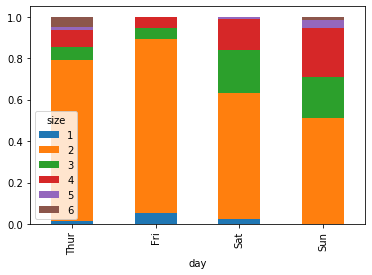

In [9]:
df.plot(kind='bar',stacked = True)